### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats

### importing the datasets

In [4]:
df['Do Not Call'].value_counts().count()

2

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### checking and getting to know about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### ploting a displot to see the distribution of a numerical data

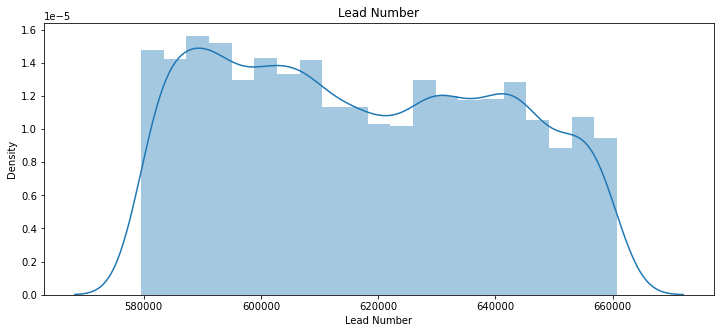

In [5]:
plt.figure(figsize=(12,5))
sns.distplot(df['Lead Number'])
plt.title('Lead Number')
plt.show()

### Inference : It looks like uniform distribution

In [6]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

### plotting pie plot 

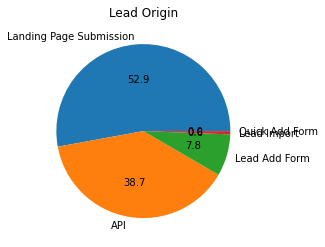

In [7]:
plt.pie(df['Lead Origin'].value_counts(),autopct='%0.01f',labels=['Landing Page Submission','API','Lead Add Form','Lead Import','Quick Add Form'])
plt.title('Lead Origin')
plt.show()

### this is balanced column

In [8]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

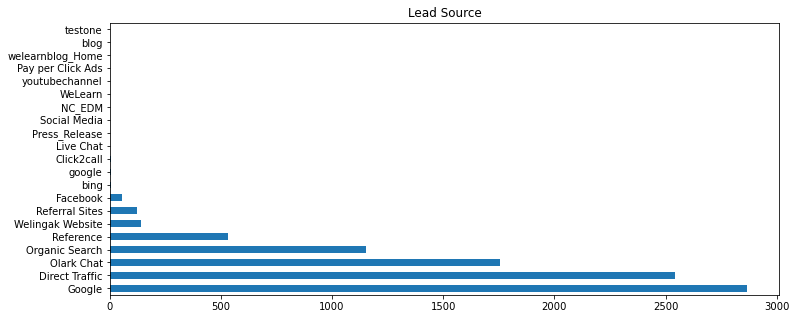

In [9]:
plt.figure(figsize=(12,5))
df['Lead Source'].value_counts().plot.barh()
plt.title('Lead Source')
plt.show()

### this is balanced column

In [10]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

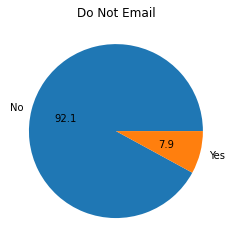

In [11]:
plt.pie(df['Do Not Email'].value_counts(),autopct='%0.01f',labels=['No','Yes'])
plt.title('Do Not Email')
plt.show()

### this is unbalanced column and should be dropped

In [12]:
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

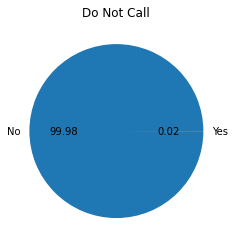

In [13]:
plt.pie(df['Do Not Call'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Do Not Call')
plt.show()

### this is highly unbalanced data should be dropped

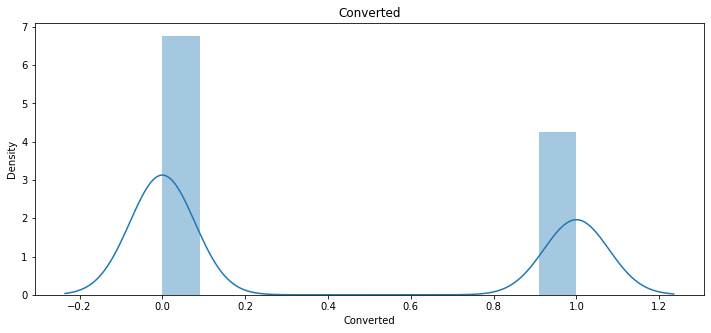

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(df['Converted'])
plt.title('Converted')
plt.show()

### this column should be transformed

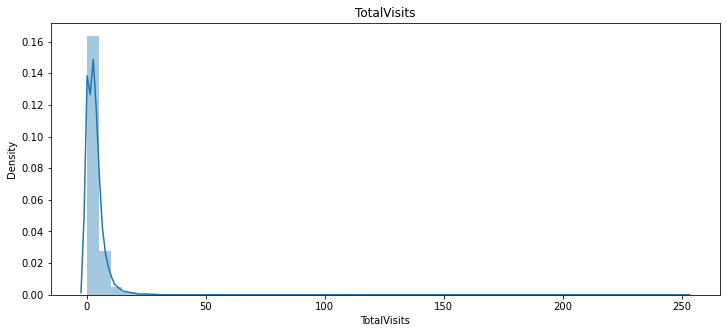

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.show()

### this is right skewed and should be transformed

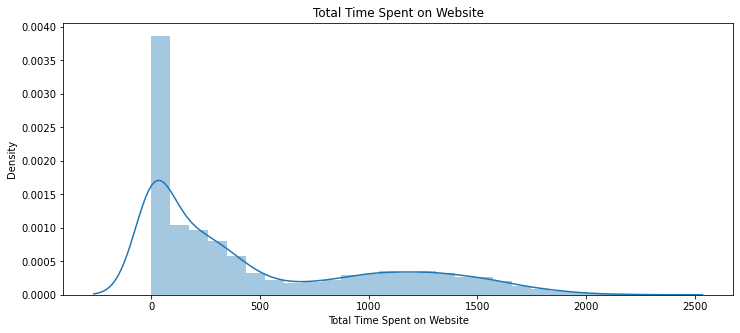

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

### this is right skewed and should be transformed

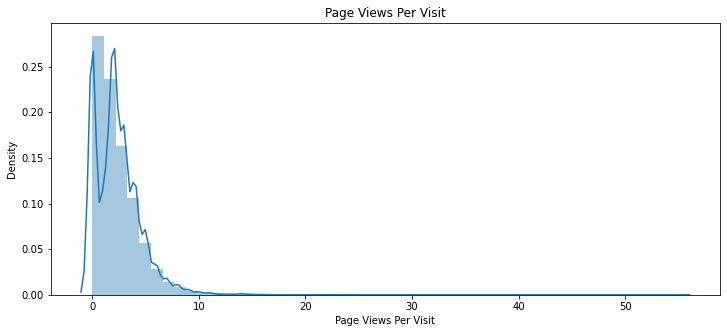

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

### this right skewed and should be transformed

In [18]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

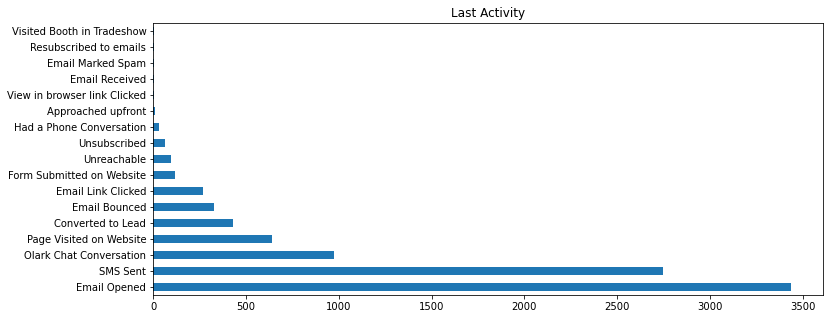

In [19]:
plt.figure(figsize=(12,5))
df['Last Activity'].value_counts().plot.barh(filter)
plt.title('Last Activity')
plt.show()

### this is balanced column

In [20]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Nigeria                    4
Sweden                     3
China                      2
Ghana                      2
Italy                      2
Philippines                2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Uganda                     2
Belgium                    2
Malaysia                   1
Switzerland                1
Vietnam                    1
Kenya                      1
Liberia                    1
Denmark                    1
Russia        

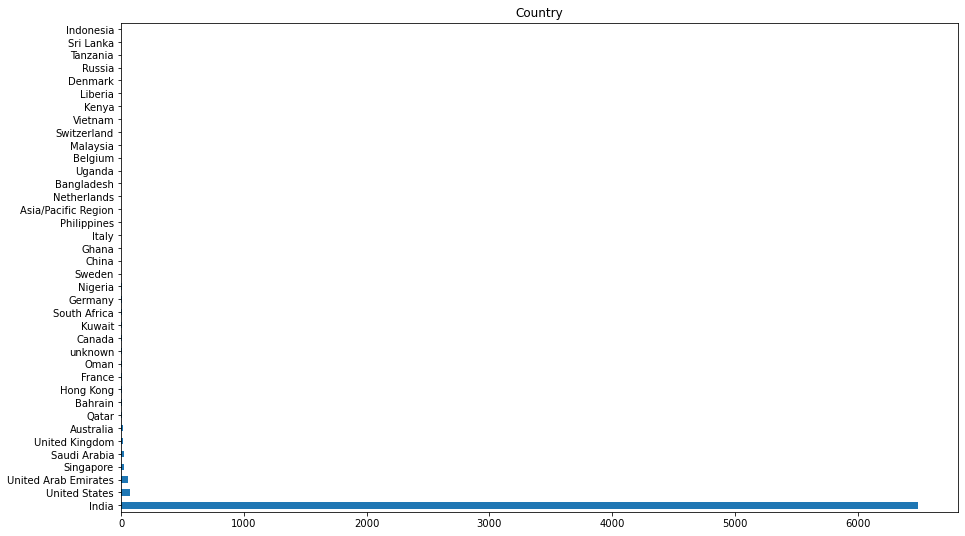

In [21]:
plt.figure(figsize=(15,9))
df['Country'].value_counts().plot.barh()
plt.title('Country')
plt.show()

### this is highly unbalanced column and should be dropped

In [22]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

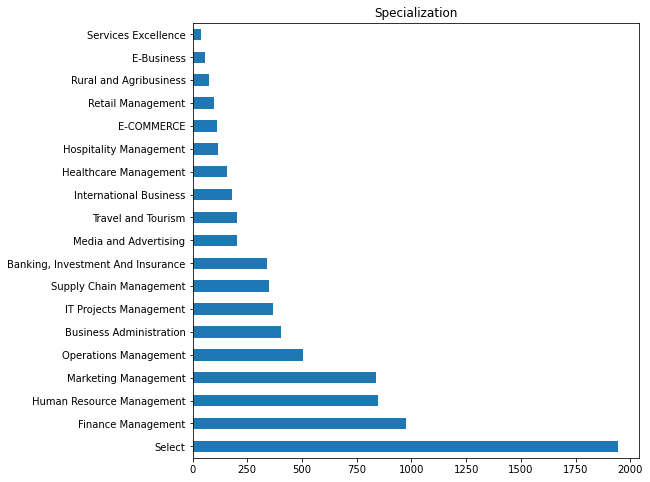

In [23]:
plt.figure(figsize=(8,8))
df['Specialization'].value_counts().plot.barh()
plt.title('Specialization')
plt.show()

### this is balanced column

In [24]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

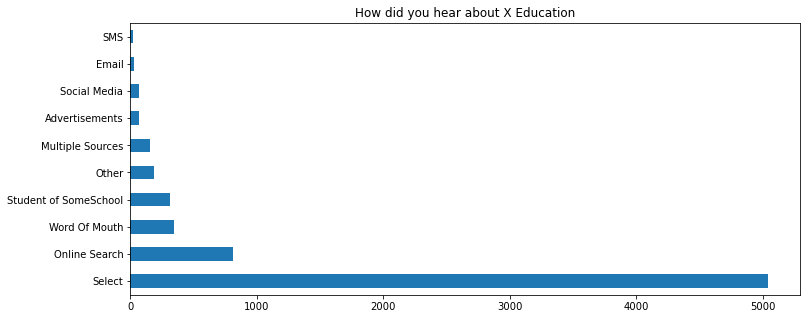

In [25]:
plt.figure(figsize=(12,5))
df['How did you hear about X Education'].value_counts().plot.barh()
plt.title('How did you hear about X Education')
plt.show()

### this is unbalanced column and should be dropped

In [26]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

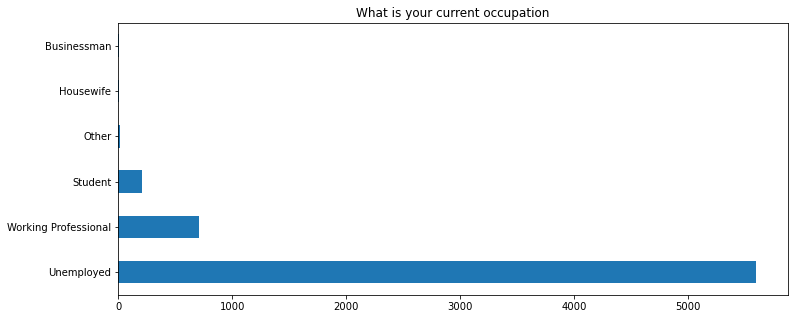

In [27]:
plt.figure(figsize=(12,5))
df['What is your current occupation'].value_counts().plot.barh()
plt.title('What is your current occupation')
plt.show()

### this unbalanced column and should be removed

In [28]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

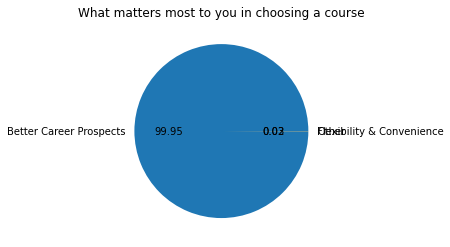

In [29]:
plt.pie(df['What matters most to you in choosing a course'].value_counts(),autopct='%0.02f',labels=['Better Career Prospects','Flexibility & Convenience','Other'])
plt.title('What matters most to you in choosing a course')
plt.show()

### this is unbalanced column and should be dropped

In [30]:
df['Search'].value_counts()


No     9226
Yes      14
Name: Search, dtype: int64

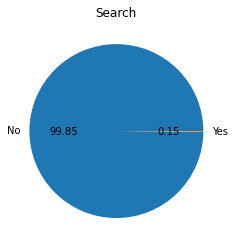

In [31]:
plt.pie(df['Search'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Search')
plt.show()

### this is unbalanced column and should be dropped

In [32]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

### this is unbalanced column and should be dropped

In [33]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

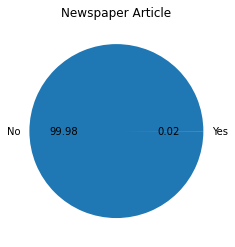

In [34]:
plt.pie(df['Newspaper Article'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Newspaper Article')
plt.show()

### this is unbalanced column and should be dropped

In [35]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

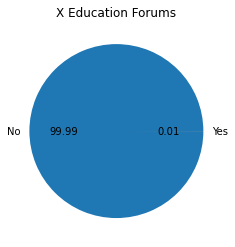

In [36]:
plt.pie(df['X Education Forums'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('X Education Forums')
plt.show()

### this is unbalanced column and should be dropped

In [37]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

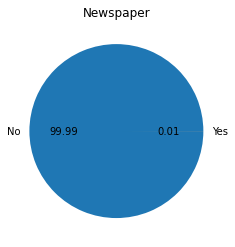

In [38]:
plt.pie(df['Newspaper'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Newspaper')
plt.show()

### this is unbalanced column and should be dropped

In [39]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

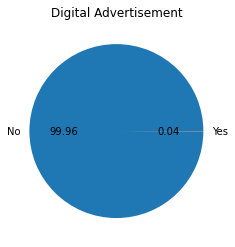

In [40]:
plt.pie(df['Digital Advertisement'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Digital Advertisement')
plt.show()

### this is unbalanced column and should be dropped

In [41]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

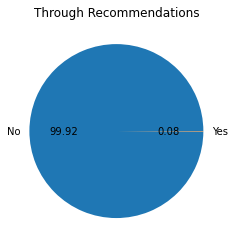

In [42]:
plt.pie(df['Through Recommendations'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.title('Through Recommendations')
plt.show()

### this is unbalanced column and should be dropped

In [43]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

### this is unbalanced column and should be dropped

In [44]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

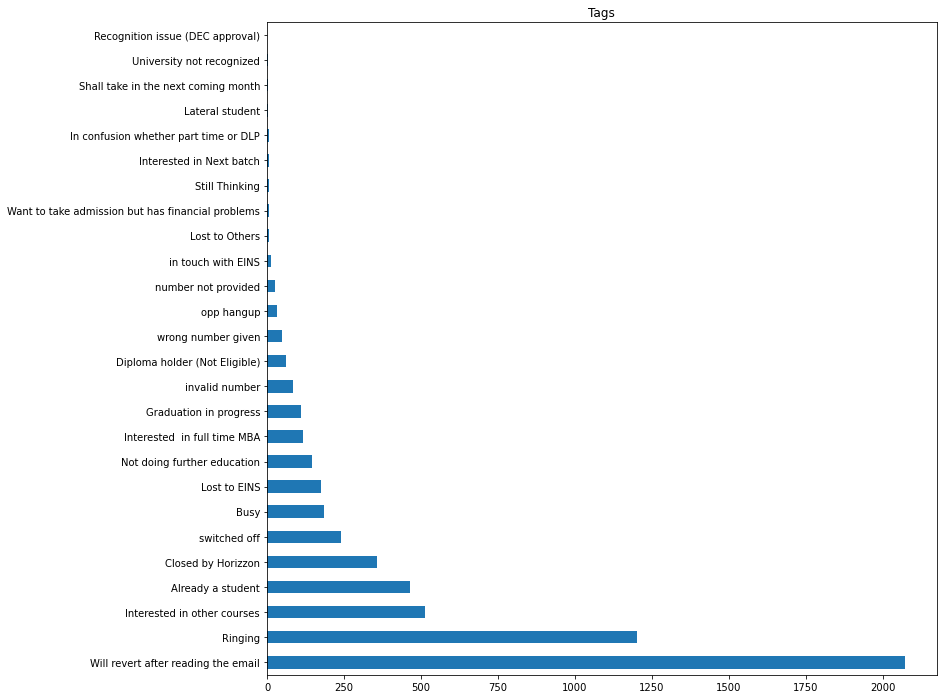

In [45]:
plt.figure(figsize=(12,12))
df['Tags'].value_counts().plot.barh()
plt.title('Tags')
plt.show()

### this is balanced column

In [46]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

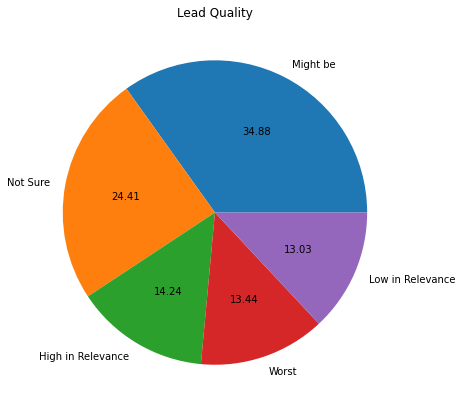

In [47]:
plt.figure(figsize=(7,7))
plt.pie(df['Lead Quality'].value_counts(),autopct='%0.02f',labels=['Might be','Not Sure','High in Relevance','Worst','Low in Relevance'])
plt.title('Lead Quality')
plt.show()

### this is balanced column

In [48]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

### this is unbalanced column and should be dropped

In [49]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

### this is unbalanced column and should be dropped

In [50]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

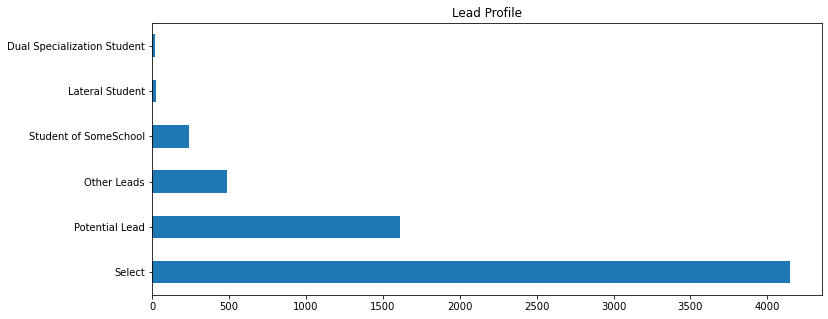

In [51]:
plt.figure(figsize=(12,5))
df['Lead Profile'].value_counts().plot.barh()
plt.title('Lead Profile')
plt.show()

### this balanced column

In [52]:
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

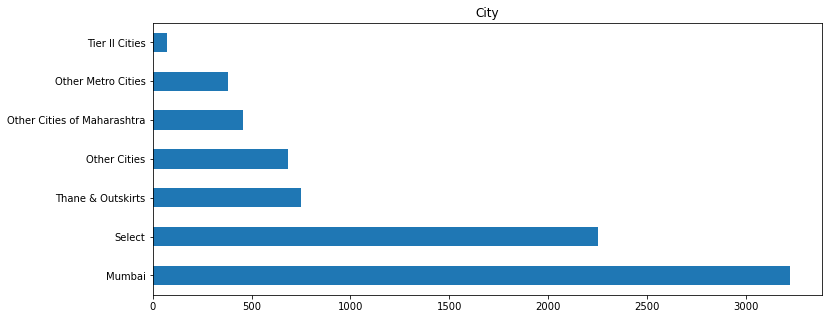

In [53]:
plt.figure(figsize=(12,5))
df['City'].value_counts().plot.barh()
plt.title('City')
plt.show()

### this balanced column

In [54]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

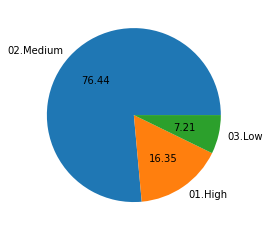

In [55]:
plt.pie(df['Asymmetrique Activity Index'].value_counts(),autopct='%0.02f',labels=['02.Medium','01.High','03.Low'])
plt.show

### this unbalanced column and should be dropped

In [56]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

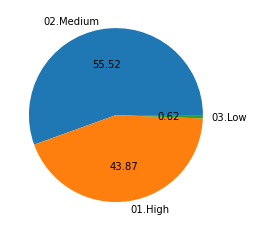

In [57]:
plt.pie(df['Asymmetrique Profile Index'].value_counts(),autopct='%0.02f',labels=['02.Medium','01.High','03.Low'])
plt.show

### this balanced column

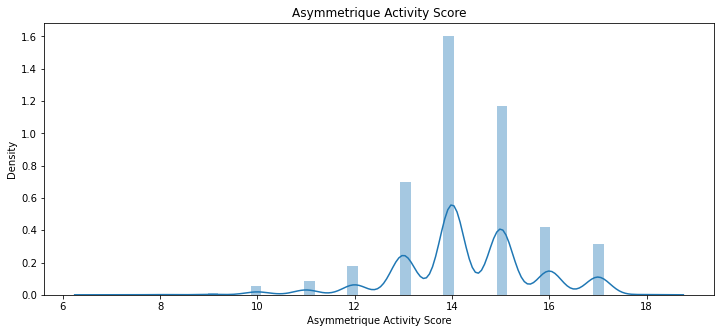

In [58]:
plt.figure(figsize=(12,5))
sns.distplot(df['Asymmetrique Activity Score'])
plt.title('Asymmetrique Activity Score')
plt.show()

### this left skewed and should be transformed

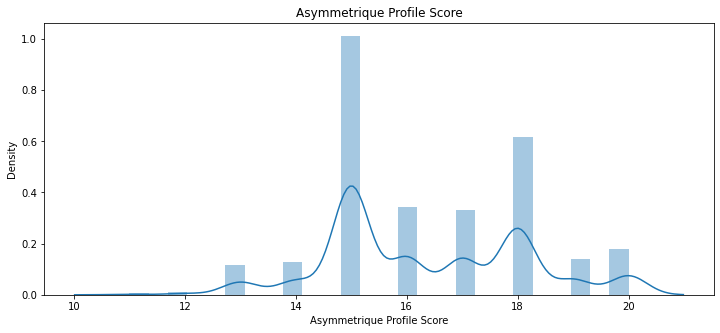

In [59]:
plt.figure(figsize=(12,5))
sns.distplot(df['Asymmetrique Profile Score'])
plt.title('Asymmetrique Profile Score')
plt.show()

### this should be transformed

In [60]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

### this is unbalanced column and should be removed

In [61]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

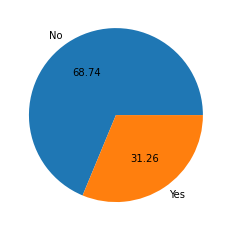

In [62]:
plt.pie(df['A free copy of Mastering The Interview'].value_counts(),autopct='%0.02f',labels=['No','Yes'])
plt.show

### this is balanced column

In [63]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

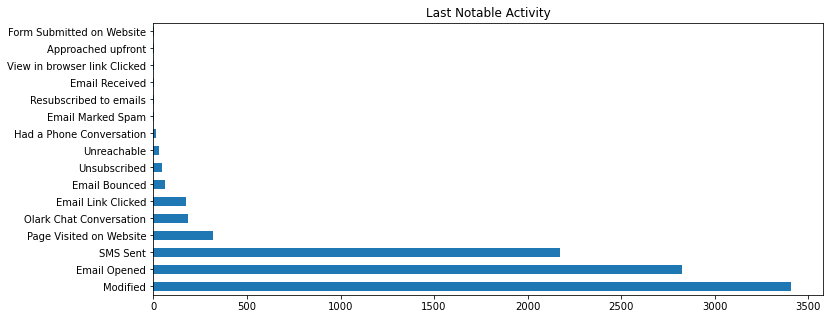

In [64]:
plt.figure(figsize=(12,5))
df['Last Notable Activity'].value_counts().plot.barh()
plt.title('Last Notable Activity')
plt.show()

### this is balanced column

In [65]:
print(df.shape)
df.drop(['Prospect ID','Do Not Email','Do Not Call','Country','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Asymmetrique Activity Index','I agree to pay the amount through cheque'],inplace=True,axis=1)
print(df.shape)


(9240, 37)
(9240, 18)


### dropping all unique identifier and unbalanced columns

In [65]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Interested in other courses,Low in Relevance,Select,Select,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Ringing,NaN,Select,Select,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Might be,Potential Lead,Mumbai,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Not Sure,Select,Mumbai,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Will revert after reading the email,Might be,Select,Mumbai,01.High,15.0,18.0,No,Modified


In [66]:
df.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
Tags                                      3353
Lead Quality                              4767
Lead Profile                              2709
City                                      1420
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [67]:
print(df.shape)
df.drop(['Lead Quality','Lead Profile','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],inplace=True,axis=1)
print(df.shape)

(9240, 18)
(9240, 13)


In [66]:
df.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
Tags                                      3353
Lead Quality                              4767
Lead Profile                              2709
City                                      1420
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

###  all the null value should be imputed

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  City                                    7820 non-null   obje

In [70]:
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

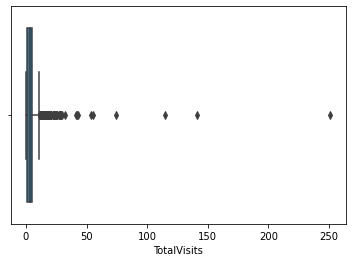

In [71]:
sns.boxplot(df['TotalVisits'])
plt.show()

### outliers are present. so it should be imputed with median

In [67]:
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

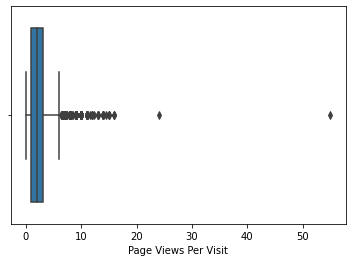

In [69]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

### outliers are present. so it should be imputed with median

In [70]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)
df['Page Views Per Visit'].isnull().sum()

0

In [75]:
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)
df['Last Activity'].isnull().sum()

0

In [76]:
df['Specialization'].fillna(df['Specialization'].mode()[0],inplace=True)
df['Specialization'].isnull().sum()

0

In [77]:
df['Tags'].fillna(df['Tags'].mode()[0],inplace=True)
df['Tags'].isnull().sum()

0

In [78]:
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['City'].isnull().sum()

0

In [79]:
df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [80]:
print(df.shape)
df.drop('Lead Number',inplace=True,axis=1)
print(df.shape)

(9240, 13)
(9240, 12)


## outliers treatment


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [82]:
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

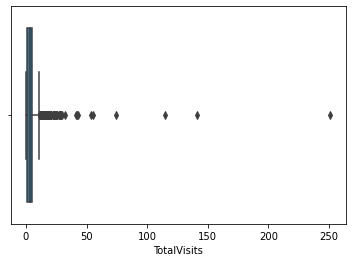

In [83]:
sns.boxplot(df['TotalVisits'])
plt.show()

In [84]:
IQRtv=df['TotalVisits'].quantile(0.75)-df['TotalVisits'].quantile(0.25)
lowtv=df['TotalVisits'].quantile(0.25)-(1.5*IQRtv)
hightv=df['TotalVisits'].quantile(0.75)+(1.5*IQRtv)
print(IQRtv,lowtv,hightv)

4.0 -5.0 11.0


In [85]:
treated_tv=np.where(df['TotalVisits']>hightv,hightv,df['TotalVisits'])
df['TotalVisits'] = pd.DataFrame(treated_tv)

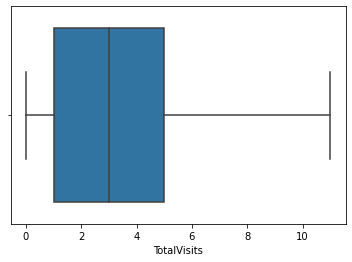

In [86]:
sns.boxplot(df['TotalVisits'])
plt.show()

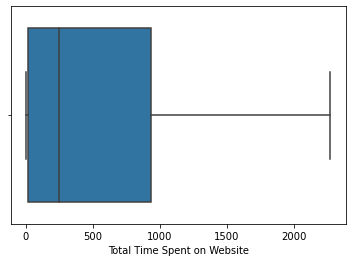

In [87]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

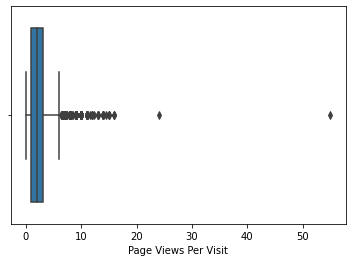

In [88]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [89]:
IQRpv=df['Page Views Per Visit'].quantile(0.75)-df['Page Views Per Visit'].quantile(0.25)
highpv=df['Page Views Per Visit'].quantile(0.75)+(1.5*IQRpv)
print(IQRpv,highpv)

2.0 6.0


In [90]:
treated_pv = np.where(df['Page Views Per Visit']>highpv,highpv,df['Page Views Per Visit'])
df['Page Views Per Visit']=pd.DataFrame(treated_pv)

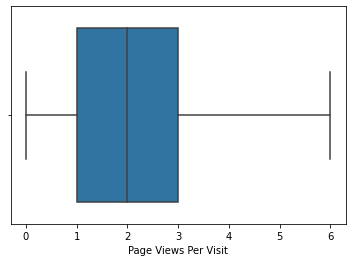

In [91]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

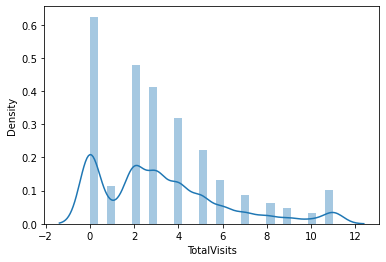

In [93]:
sns.distplot(df['TotalVisits'])
plt.show()

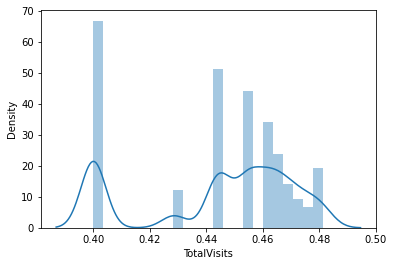

In [95]:
df['TotalVisits'] =1/ (df['TotalVisits']+2)
sns.distplot(df['TotalVisits'])
plt.show()


Optimal lambda:  23.261174727416005


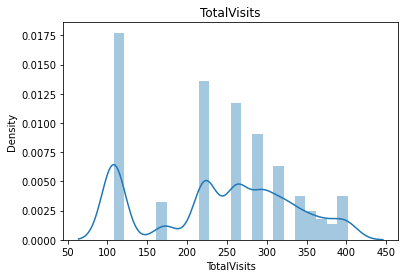

In [96]:
df['TotalVisits'], param = stats.boxcox(df['TotalVisits']+1) # you can vary the exponent as needed


sns.distplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.show()

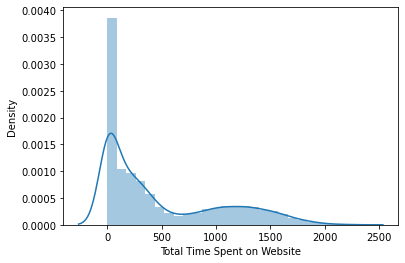

In [96]:
sns.distplot(df['Total Time Spent on Website'])
plt.show()

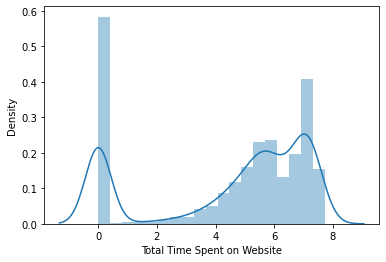

In [97]:
df['Total Time Spent on Website'] = np.log(df['Total Time Spent on Website']+1)
sns.distplot(df['Total Time Spent on Website'])
plt.show()

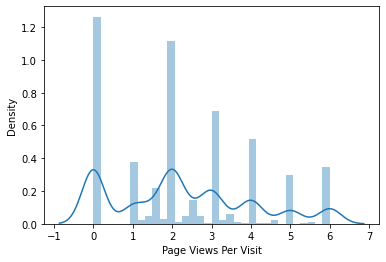

In [98]:
sns.distplot(df['Page Views Per Visit'])
plt.show()

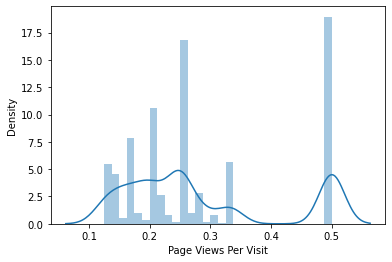

In [99]:
a = 1/(df['Page Views Per Visit']+2)
sns.distplot(a)
plt.show()

## categorical treatment

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   float64
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [101]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

### one hot encoding

In [102]:
dummies = pd.get_dummies(df['Lead Origin'])
print(df.shape)
df.drop('Lead Origin',inplace=True,axis=1)
print(df.shape)

(9240, 12)
(9240, 11)


In [103]:
df = pd.concat([dummies,df],axis=1)
df.shape

(9240, 16)

In [104]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
testone                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [105]:
df['Lead Source'].replace(to_replace=['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Social Media','Live Chat','Press_Release','youtubechannel','blog','NC_EDM','welearnblog_Home','testone','WeLearn','Pay per Click Ads'],
               value=[1,3,7,59,102,654,759,11,103,459,652,326,985,785,5213,69,98,574,12,22,99],inplace=True)

In [106]:
df['Lead Source'].value_counts()

1       2904
3       2543
7       1755
59      1154
102      534
654      142
759      125
11        55
103        6
459        5
652        4
785        2
326        2
985        2
69         1
22         1
574        1
12         1
99         1
98         1
5213       1
Name: Lead Source, dtype: int64

In [107]:
df['Last Activity'].value_counts().count()

17

In [108]:
df['Last Activity'].replace(to_replace=['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],
                            value=[1,3,7,59,102,654,759,11,103,459,652,326,985,785,5213,69,98],inplace=True)


In [109]:
df['Last Activity'].value_counts().count()

17

In [110]:
df['Specialization'].value_counts().count()

19

In [111]:
df['Specialization'].replace(['Select','Finance Management','Human Resource Management','Marketing Management','Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Media and Advertising','Travel and Tourism','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],
                            value=[1,3,7,59,102,654,759,11,103,459,652,326,985,785,5213,69,98,574,12],inplace=True)

In [112]:
df['Specialization'].value_counts()

1       3380
3        976
7        848
59       838
102      503
654      403
759      366
11       349
103      338
652      203
459      203
326      178
985      159
785      114
5213     112
69       100
98        73
574       57
12        40
Name: Specialization, dtype: int64

In [113]:
df['Tags'].value_counts().count()

    


26

In [114]:
df['Tags'].replace(to_replace=['Will revert after reading the email','Ringing','Interested in other courses','Already a student','Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],
                  value=[1,3,7,59,102,654,759,11,103,459,652,326,985,785,5213,69,98,574,12,22,99,3216,555,666,333,222],inplace=True)

In [115]:
df['Tags'].value_counts()

1       5425
3       1203
7        513
59       465
102      358
654      240
759      186
11       175
103      145
459      117
652      111
326       83
985       63
785       47
5213      33
69        27
98        12
574        7
12         6
22         6
99         5
3216       5
555        3
333        2
666        2
222        1
Name: Tags, dtype: int64

In [116]:
df['City'].value_counts()

Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [117]:
df['City'].replace(to_replace=['Mumbai','Select','Thane & Outskirts','Other Cities','Other Cities of Maharashtra','Other Metro Cities','Tier II Cities'],
                  value=[23,45,65,102,98,66,32],inplace=True)

In [118]:
df['City'].value_counts()

23     4642
45     2249
65      752
102     686
98      457
66      380
32       74
Name: City, dtype: int64

In [119]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [120]:
df['A free copy of Mastering The Interview'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)

In [121]:
df['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [124]:
df['Last Notable Activity'].value_counts().count()

16

In [125]:
df['Last Notable Activity'].replace(to_replace=['Modified','Email Opened','SMS Sent','Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','View in browser link Clicked','Form Submitted on Website','Email Received','Approached upfront','Resubscribed to emails'],
                                   value=[1,3,7,59,102,654,759,11,103,459,652,326,985,785,5213,98],inplace=True)

In [126]:
df['Last Notable Activity'].value_counts()

1       3407
3       2827
7       2172
59       318
102      183
654      173
759       60
11        47
103       32
459       14
652        2
785        1
985        1
98         1
326        1
5213       1
Name: Last Notable Activity, dtype: int64

In [129]:
df.head(20)

,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,1,0,0,0,0,7,0,0.202709,0.000000,0.00,59,1,7,45,0,1
1,1,0,0,0,0,59,0,0.103889,6.514713,2.50,1,1,3,45,0,3
2,0,1,0,0,0,3,1,0.148572,7.334982,2.00,1,654,1,23,1,3
3,0,1,0,0,0,3,0,0.172282,5.723585,1.00,103,459,3,23,0,1
4,0,1,0,0,0,1,1,0.148572,7.264730,1.00,102,1,1,23,0,1
5,1,0,0,0,0,7,0,0.202709,0.000000,0.00,7,1,1,23,0,1
6,0,1,0,0,0,1,1,0.148572,7.403061,2.00,1,11,1,23,0,1
7,1,0,0,0,0,7,0,0.202709,0.000000,0.00,7,1,1,23,0,1
8,0,1,0,0,0,3,0,0.148572,4.276666,2.00,1,759,1,65,1,3
9,1,0,0,0,0,1,0,0.115606,4.077537,4.00,1,3,1,23,0,3


In [130]:
df.tail(20)

,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
9220,0,1,0,0,0,3,0,0.103889,3.044522,2.50,3,3,785,65,1,1
9221,0,1,0,0,0,1,0,0.115606,7.206377,2.00,3,459,326,23,1,7
9222,1,0,0,0,0,1,0,0.094278,5.433722,6.00,3,69,1,102,0,1
9223,1,0,0,0,0,59,0,0.086266,4.962845,6.00,1,102,103,23,1,1
9224,0,1,0,0,0,1,0,0.115606,6.122493,4.00,11,102,7,23,0,1
9225,0,1,0,0,0,3,0,0.148572,4.317488,2.00,654,326,785,23,1,1
9226,1,0,0,0,0,7,0,0.202709,0.000000,0.00,3,1,3,45,0,1
9227,0,1,0,0,0,1,1,0.103889,7.157735,1.67,1,11,1,23,0,3
9228,0,1,0,0,0,1,1,0.115606,7.573017,2.00,3,3,1,23,1,1
9229,0,1,0,0,0,59,1,0.064289,7.112327,6.00,3,59,1,23,1,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   API                                     9240 non-null   uint8  
 1   Landing Page Submission                 9240 non-null   uint8  
 2   Lead Add Form                           9240 non-null   uint8  
 3   Lead Import                             9240 non-null   uint8  
 4   Quick Add Form                          9240 non-null   uint8  
 5   Lead Source                             9240 non-null   int64  
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   float64
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   int6

In [133]:
df.describe()

,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.387446,0.528788,0.077706,0.005952,0.000108,37.826840,0.385390,0.139721,4.506633,2.255105,64.424242,200.625000,91.277381,43.187987,0.312554,26.206926
std,0.487193,0.499198,0.267722,0.076926,0.010403,132.804422,0.486714,0.042871,2.742945,1.779471,194.812021,611.895907,369.835244,25.925456,0.463559,122.384954
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.064289,0.000000,0.000000,1.000000,1.000000,1.000000,23.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.103889,2.564949,1.000000,1.000000,1.000000,1.000000,23.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.130154,5.517453,2.000000,3.000000,7.000000,1.000000,23.000000,0.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.172282,6.842683,3.000000,7.000000,102.000000,7.000000,45.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5213.000000,1.000000,0.202709,7.728856,6.000000,5213.000000,5213.000000,5213.000000,102.000000,1.000000,5213.000000


In [137]:
df.to_csv('deepak_leads_EDA.csv')